## <center> <h1>3:2:1 Crack Spread</h1> </center>

<center> <p1>Crack spreads are differences between wholesale petroleum product prices and crude oil prices. These spreads are often used to estimate refining margins. Crack spreads are a simple measure based on one or two products produced in a refinery (usually gasoline and distillate fuel). They do not take into consideration all refinery product revenues and exclude refining costs other than the cost of crude oil$[1]$.</p1> </center>

$[1]$ An Introduction to Crack Spreads.” US Energy Information Administration Independent Statistics & Analytics, US Energy Information Administration , 2 June 2011, www.eia.gov/todayinenergy/detail.php?id=1630.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

#spread ratio
o, g, h = (3, 2, 1)

#import EIA price date (06/07/2020)
df = pd.read_csv('NYMEX_Futures_Prices.csv', skiprows = 6).set_index('Day')
df = df.rename(columns={'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 ($/gal) $/gal': 'RBOB', 
                        'Cushing OK Crude Oil Future Contract 1 ($/bbl) $/bbl': 'Crude', 
                        'New York Harbor No. 2 Heating Oil Future Contract 1 ($/gal) $/gal': 'Heating Oil'})
df.index = pd.to_datetime(df.index)

#calculate the crack spread
df['Spread'] = (df['RBOB'] * g + df['Heating Oil'] * h) - df['Crude'] / 42 * o
df = df[df.index >= '10/3/2005']

#display df
df

,RBOB,Crude,Heating Oil,Spread
Day,,,,
2020-06-02,1.118,36.81,1.092,0.698714
2020-06-01,1.067,35.44,1.029,0.631571
2020-05-29,1.026,35.49,0.965,0.482000
2020-05-28,0.999,33.71,0.926,0.516143
2020-05-27,0.993,32.81,0.972,0.614429
...,...,...,...,...
2005-10-07,1.740,61.84,1.960,1.022857
2005-10-06,1.720,61.36,1.951,1.008143
2005-10-05,1.765,62.79,2.015,1.060000


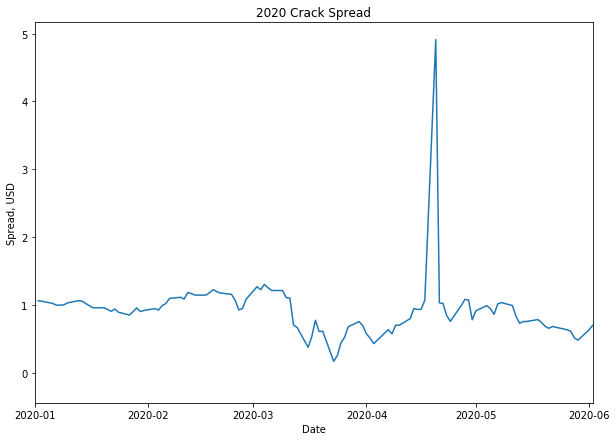

In [22]:
#plot EIA calculated spread
fix, ax = plt.subplots(figsize = (10, 7))

x = df.index.get_loc('01/01/2020')
y = df.index.get_loc('05/01/2020')

ax.plot(df.index, df['Spread'])
ax.set_xlim(df.index[x], df.index[0])

plt.xlabel('Date')
plt.ylabel('Spread, USD')
plt.title('2020 Crack Spread')
plt.show()
# type(df.index[-1]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


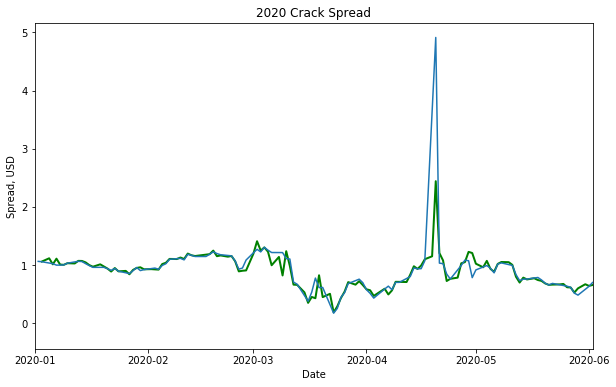

In [23]:
import yfinance as yf

#spread ratio
o1, g1, h1 = (3, 2, 1)

#get futures data from yahoo! finance
crude = yf.download('CL=F')
ho = yf.download('HO=F')
gas = yf.download('RB=F')

#data cleaning and calculation
cs = gas.merge(ho, on = 'Date', how = 'left').merge(crude, on = 'Date', how = 'left')
cs = cs[['Close_x', 'Close_y', 'Close']]
cs = cs.rename(columns = {'Close_x':'gas', 'Close_y': 'heating', 'Close': 'crude'}).ffill()
#cs['Date'] = cs['Date'].astype(str)
cs['spread'] = (cs['gas'] * g1 + cs['heating'] * h1) - cs['crude'] / 42 * o1

#plot EIA and yahoo! finance spreads
fig = plt.figure(figsize = (10,6))
ax = fig.subplots()

dates = cs.index
ax.plot(dates, cs['spread'], linewidth = 2, c = 'g')
ax.plot(df.index, df['Spread'])
ax.set_xlim(df.index[x], df.index[0])

plt.xlabel('Date')
plt.ylabel('Spread, USD')
plt.title('2020 Crack Spread')

plt.show()